In [1]:
import scanpy as sc

# Fix export PDF as text issue
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from utils import *

In [5]:
ad = sc.read_h5ad('../data/integrated/morse_n_adams_n_bal_scvi_patient.id_138341_400_revision.h5ad')

Based on new annotations provided by Oliver, we update the mdm.type annotation

In [6]:
ad.obs[ad.obs['study'] == 'budinger']['patient.id'].value_counts()

Case 1    12258
PMB 1      5309
PMB 2      5243
001C          0
238CO         0
          ...  
137CO         0
137C          0
135I          0
133C          0
SC156         0
Name: patient.id, Length: 104, dtype: int64

In [7]:
# check the cell proportions

In [8]:
counts_adams = ad.obs[ad.obs['study'] == 'adams']['disease.status'].value_counts()
counts_adams / counts_adams.sum()

COPD        0.333333
IPF         0.333333
control     0.333333
BAL (NA)    0.000000
covid       0.000000
Name: disease.status, dtype: float64

In [9]:
print(counts_adams)
print(counts_adams / counts_adams.sum())

COPD        30159
IPF         30159
control     30159
BAL (NA)        0
covid           0
Name: disease.status, dtype: int64
COPD        0.333333
IPF         0.333333
control     0.333333
BAL (NA)    0.000000
covid       0.000000
Name: disease.status, dtype: float64


In [10]:
counts_morse = ad.obs[ad.obs['study'] == 'morse']['disease.status'].value_counts()
counts_morse / sum(counts_morse)

control     0.527035
IPF         0.472965
BAL (NA)    0.000000
COPD        0.000000
covid       0.000000
Name: disease.status, dtype: float64

In [11]:
print(counts_morse)
print(counts_morse / sum(counts_morse))

control     9250
IPF         8301
BAL (NA)       0
COPD           0
covid          0
Name: disease.status, dtype: int64
control     0.527035
IPF         0.472965
BAL (NA)    0.000000
COPD        0.000000
covid       0.000000
Name: disease.status, dtype: float64


In [12]:
counts_morse

control     9250
IPF         8301
BAL (NA)       0
COPD           0
covid          0
Name: disease.status, dtype: int64

In [13]:
counts_bal = ad.obs[ad.obs['study'] == 'BAL']['disease.status'].value_counts()
counts_bal / sum(counts_bal)

BAL (NA)    1.0
COPD        0.0
IPF         0.0
control     0.0
covid       0.0
Name: disease.status, dtype: float64

In [14]:
counts_morse = ad.obs[ad.obs['study'] == 'morse']['disease.status'].value_counts()
counts_morse / sum(counts_morse)

control     0.527035
IPF         0.472965
BAL (NA)    0.000000
COPD        0.000000
covid       0.000000
Name: disease.status, dtype: float64

In [15]:
ad.obs['study'].value_counts()

adams       90477
budinger    22810
morse       17551
BAL          7503
Name: study, dtype: int64

In [16]:
ad.shape

(138341, 17656)

In [17]:
print('here...')
import datetime
print(datetime.datetime.now())

here...
2021-11-30 16:53:07.106245


### add the mdm annotation

In [18]:
bal = get_bal()

bal
True ../data/bal/bal.h5ad
True ../data/bal/bal.h5ad


/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/utils.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bal.obs['patient.id'] = bal.obs['patient']
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/utils.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bal.obs[

adding annotation from bal mdm...
scoring genes...
scoring MP.markers 20
scoring MP.others 10
scoring MP.all 31


In [19]:
bal.obs.index

Index(['AAACCCACAAGCAATA-2', 'AAAGAACGTGTCCGTG-2', 'AAAGGGCCAAGCGCAA-2',
       'AAAGGGCCAGCGAGTA-2', 'AAAGGTACACGGTGTC-2', 'AAAGTCCCAAGGCCTC-2',
       'AAAGTCCCACATACTG-2', 'AAAGTCCTCCTCAGGG-2', 'AAAGTCCTCTTGAGCA-2',
       'AAAGTGAGTTACCCTC-2',
       ...
       'TTCCTAAAGTGCTCAT-8', 'TTCCTCTCATCAGTCA-8', 'TTGATGGAGTTGCTGT-8',
       'TTGCCTGAGCAACAAT-8', 'TTGGATGTCAACCGAT-8', 'TTGGGATCAGCTACTA-8',
       'TTTGACTAGGTTCTTG-8', 'TTTGGTTCAAGTGCTT-8', 'TTTGTTGCAATGAGCG-8',
       'TTTGTTGGTAGTAAGT-8'],
      dtype='object', length=7503)

In [20]:
bal_mdm = sc.read_h5ad('../data/bal/bal_mdm.h5ad')
bal.obs['mdm.type'] = bal.obs.index.map(bal_mdm.obs.Cluster.to_dict())
bal.obs['mdm.type'].value_counts()

MDM 2        2006
MDM 3B       1518
MDM 3A       1426
MDM 1        1023
AM 2          929
AM 1          168
Undefined      75
Name: mdm.type, dtype: int64

In [21]:
# here we update the annotation based on labels that Oliver provided on 03.15.2021
annot_new = pd.read_csv('../data/BAL-Mac_labels.csv', index_col=0)
annot_new['found'] = annot_new.index.isin(bal.obs.index)

bal.obs['mdm.type'] = bal.obs.index.map(annot_new['x'].to_dict())
annot_new['x'].value_counts()

2 Mono/Mp          3002
3 SPP1/LGMN-Mp     1274
5 INHBA-AMp        1064
1 FCN1-Mono        1027
4 SPP1/TREM2-Mp     866
6 Prolif. AMp       207
Low quality         148
Name: x, dtype: int64

In [22]:
budinger = ad[ad.obs['study'] == 'budinger',:]

In [23]:
budinger.obs['patient.id'].value_counts()

Case 1    12258
PMB 1      5309
PMB 2      5243
Name: patient.id, dtype: int64

In [24]:
ad.obs[ad.obs['study'] == 'budinger']['patient.id'].value_counts().head(100)

Case 1    12258
PMB 1      5309
PMB 2      5243
001C          0
238CO         0
          ...  
153CO         0
152CO         0
145I          0
138I          0
137CO         0
Name: patient.id, Length: 100, dtype: int64

In [25]:
bal.obs['mdm.type'].value_counts()

2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [26]:
np.bincount(annot_new.index.isin(bal.obs.index))

array([ 443, 7145])

In [27]:
bal.shape

(7503, 27007)

In [28]:
bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
bal.obs['mdm.type'].value_counts()


2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
Others (COVID)      358
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [29]:
ad.obs[ad.obs['study'] == 'BAL'].index

Index(['AAACCCACAAGCAATA-2-1-0-0-0-0', 'AAAGAACGTGTCCGTG-2-1-0-0-0-0',
       'AAAGGGCCAAGCGCAA-2-1-0-0-0-0', 'AAAGGGCCAGCGAGTA-2-1-0-0-0-0',
       'AAAGGTACACGGTGTC-2-1-0-0-0-0', 'AAAGTCCCAAGGCCTC-2-1-0-0-0-0',
       'AAAGTCCCACATACTG-2-1-0-0-0-0', 'AAAGTCCTCCTCAGGG-2-1-0-0-0-0',
       'AAAGTCCTCTTGAGCA-2-1-0-0-0-0', 'AAAGTGAGTTACCCTC-2-1-0-0-0-0',
       ...
       'TTCCTAAAGTGCTCAT-8-1-0-0-0-0', 'TTCCTCTCATCAGTCA-8-1-0-0-0-0',
       'TTGATGGAGTTGCTGT-8-1-0-0-0-0', 'TTGCCTGAGCAACAAT-8-1-0-0-0-0',
       'TTGGATGTCAACCGAT-8-1-0-0-0-0', 'TTGGGATCAGCTACTA-8-1-0-0-0-0',
       'TTTGACTAGGTTCTTG-8-1-0-0-0-0', 'TTTGGTTCAAGTGCTT-8-1-0-0-0-0',
       'TTTGTTGCAATGAGCG-8-1-0-0-0-0', 'TTTGTTGGTAGTAAGT-8-1-0-0-0-0'],
      dtype='object', length=7503)

In [30]:
ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-10].map(bal.obs['mdm.type'].to_dict()), 'Others (COVID)')
ad.obs['mdm.type'] = np.where(ad.obs['study'] != 'BAL', 'Others (A/M/B)', ad.obs['mdm.type'])
# bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
# ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-4].map(bal.obs['mdm.type'].to_dict()), 'Others (Adams/Morse)')

In [31]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

### Plot UMAPs

In [32]:
import scanpy as sc
sc.set_figure_params(facecolor='white', vector_friendly=True)

In [33]:
print('plotting...')
rcParams['figure.dpi'] = 110

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 10))
ax = ax.flatten()

print(1)
sc.pl.umap(ad, color='study', title='study', ax=ax[0], show=False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

print(2)
sc.pl.umap(ad, color='patient.id', title='patient (n=%i)' % len(set(ad.obs['patient.id'])),
           ax=ax[1], show=False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].get_legend().remove()
plt.xlabel('')
plt.ylabel('')

print(3)
sc.pl.umap(ad, color='cell.type', title='cell type', ax=ax[2], show=False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

print(4)
sc.pl.umap(ad, color='MP.markers.score' if 'study' in ad.obs else batch, title='score - 20 marker genes', ax=ax[3], show=False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

print(5)
sc.pl.umap(ad, color='MP.others.score', title='score - 9 marker genes', ax=ax[4], show=False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

print(6)
sc.pl.umap(ad, color='disease.status', title='disease.status', ax=ax[5], show=False)
ax[5].spines['right'].set_visible(False)
ax[5].spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('')

plt.savefig('../data/figures/umap_scvi_integrated_revision.pdf')
plt.close()
# plt.savefig('../data/figures/umap_scvi_integrated_revision.png')
# plt.close()

plotting...
1


/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'mdm.type' as categorical


2
3
4
5
6


In [34]:
from os.path import abspath

In [35]:
# abspath('../data/figures/umap_scvi_integrated_revision.pdf')

In [36]:
sc.tl.leiden(ad)

In [37]:
ax = plt.subplot()
sc.pl.umap(ad, color='leiden', title='leiden', ax=ax, show=False) #  ax=ax[5], show=False)
plt.subplots_adjust(right=.6)

plt.savefig('../data/figures/umap_scvi_integrated_leiden_revision.pdf')
plt.close()

In [38]:
ad_bal = ad[ad.obs['study'].astype(str).str.contains('BAL'),:]
hm = ad_bal.obs[['leiden', 'mdm.type']].groupby(['leiden', 'mdm.type']).size().reset_index().pivot('leiden', 'mdm.type', 0)

ad_others = ad[~ad.obs['study'].astype(str).str.contains('BAL'),:]
hm_others = ad_others.obs[['leiden', 'disease.status']].groupby(['leiden', 'disease.status']).size().reset_index().pivot('leiden', 'disease.status', 0)

In [39]:
import seaborn as sns

In [40]:
import importlib
from importlib import reload
reload(sns)
import seaborn as sns

In [41]:
# sns.clustermap(hm,  cmap='Reds')

In [42]:

g = sns.clustermap(hm, cmap='Reds', annot=hm, fmt='')

order_leiden = g.dendrogram_row.reordered_ind
plt.subplots_adjust(bottom=.6, right=.6)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.savefig('../data/figures/heatmap_counts_per_condition_leiden_revision.pdf')
plt.close()
hm_others.reindex(order_leiden)

disease.status,COPD,IPF,control,covid
leiden,,,,
6,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [43]:
hm_others

disease.status,COPD,IPF,control,covid
leiden,,,,
0,5530,4714,7138,362
1,1722,4614,8323,3056
2,7672,4394,4116,323
3,6241,2653,2630,134
4,1465,3011,1007,5647
5,232,2515,4625,2405
6,406,2267,1300,4391
7,366,6433,758,1448
8,2717,1853,4399,266


In [44]:
print('here...')

here...


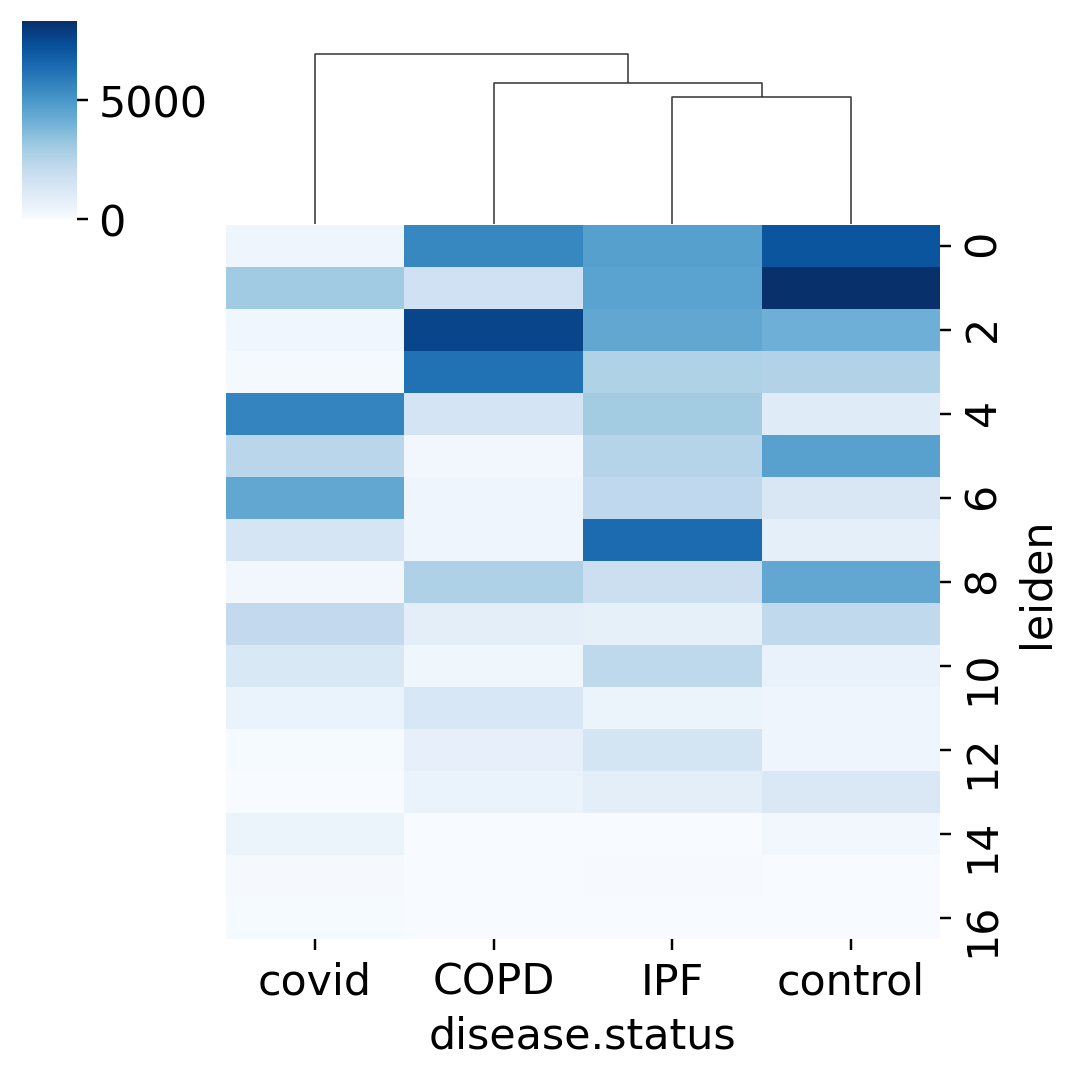

In [45]:
sns.clustermap(hm_others, row_cluster=False, cmap='Blues', figsize=[5, 5]) #  annot=hm_others.fillna(0)) # fmt='')

In [46]:
hm_others.index = hm_others.index.astype(int)
# hm_others = hm_others.reindex(order_leiden)
g = sns.clustermap(hm_others.fillna(0), row_cluster=False, cmap='Blues', annot=hm_others.fillna(0), fmt='')

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.subplots_adjust(bottom=.6, right=.3)
plt.savefig('../data/figures/heatmap_counts_per_condition_leiden_disease_status_morse_or_adams_revision.pdf')
plt.close()

In [47]:
order_leiden

[6, 5, 0, 1, 11, 4, 7, 12, 2, 14, 9, 10, 3, 15, 8, 13]

### annotate based on uniquely mapped cells from the previous notebook (06_see_results_scvi_by_bals).

In [48]:
final = sc.read_h5ad('../data/bal_cells_uniquely_mapped.h5ad')

In [49]:
final.obs.groupby(['closest.disease.status', 'mdm.type']).size().reset_index().sort_values('mdm.type')

,closest.disease.status,mdm.type,0
0,COPD,AM 1,0
14,control,AM 1,1
7,IPF,AM 1,26
1,COPD,AM 2,3
15,control,AM 2,11
8,IPF,AM 2,10
2,COPD,MDM 1,11
16,control,MDM 1,196
9,IPF,MDM 1,78
17,control,MDM 2,88


In [50]:
final.obs

,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,patient.id,cell.type,study,disease.status,...,patient,dpso,age,sex,Celltype_2,Timepoint,ident,mdm.type,selection,closest.disease.status
GCAGCTGAGCCACTCG-3-1-0-0,nan,nan,20578.0,NaN,NaN,NaN,C19-83,Macrophages,BAL,MDM 3A,...,C19-83,10,56,Female,Macrophages,Intermediate,4,MDM 3A,MDM 3A:COPD,COPD
GGATGTTGTACAACGG-3-1-0-0,nan,nan,17231.0,NaN,NaN,NaN,C19-83,Macrophages,BAL,MDM 3A,...,C19-83,10,56,Female,Macrophages,Intermediate,4,MDM 3A,MDM 3A:COPD,COPD
TAGGGTTAGACATATG-3-1-0-0,nan,nan,12357.0,NaN,NaN,NaN,C19-83,Macrophages,BAL,MDM 3A,...,C19-83,10,56,Female,Macrophages,Intermediate,4,MDM 3A,MDM 3A:COPD,COPD
GCACTAAGTCTGCCTT-6-1-0-0,nan,nan,23267.0,NaN,NaN,NaN,C19-98,Macrophages,BAL,MDM 3A,...,C19-98,10,63,Male,Macrophages,Intermediate,37,MDM 3A,MDM 3A:COPD,COPD
GTTAGACAGCTCTTCC-6-1-0-0,nan,nan,42924.0,NaN,NaN,NaN,C19-98,Macrophages,BAL,MDM 3A,...,C19-98,10,63,Male,Macrophages,Intermediate,37,MDM 3A,MDM 3A:COPD,COPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCATACTGTGGCGCTT-8-1-1,nan,nan,2699.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,C19-120,25,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control
TCGATTTCAACCACAT-8-1-1,nan,nan,4655.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,C19-120,25,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control
TGTAAGCCAGGTCCGT-8-1-1,nan,nan,4622.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,C19-120,25,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control
TGTACAGCATCCGAAT-8-1-1,nan,nan,13354.0,NaN,NaN,NaN,C19-120,Macrophages,BAL,MDM 1,...,C19-120,25,nan,Male,Macrophages,Late,17,MDM 1,MDM 1:control,control


In [51]:
ad.obs['study'].value_counts()

adams       90477
budinger    22810
morse       17551
BAL          7503
Name: study, dtype: int64

In [52]:
final.obs['study'].value_counts()

BAL    930
Name: study, dtype: int64

In [53]:
ad_bal.obs['study'].value_counts()

BAL    7503
Name: study, dtype: int64

In [54]:
final.obs['index.bc'] = final.obs.index.str.split('-').str[0]
ad_bal.obs['index.bc'] = ad_bal.obs.index.str.split('-').str[0]

Trying to set attribute `.obs` of view, copying.


In [55]:
final.obs['leiden'] = final.obs['index.bc'].str.split('-').str[0].map(ad_bal.obs.set_index('index.bc')['leiden'].to_dict())

In [56]:
hm_final = final.obs[['leiden', 'mdm.type']].groupby(['leiden', 'mdm.type']).size().reset_index().pivot('leiden', 'mdm.type', 0)
hm_final.index = hm_final.index.astype(int)
# hm_final = hm_final.reindex(order_leiden).fillna(0)
print(hm_final.sum())

g = sns.clustermap(hm_final, row_cluster=False, cmap='Greens', annot=hm_final.fillna(0).astype(int), fmt='')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.subplots_adjust(bottom=.6, right=.6)
plt.savefig('../data/figures/heatmap_counts_per_condition_leiden_disease_status_mdm_filtered_connectivity_uniq.pdf')
plt.close()

mdm.type
AM 1          27
AM 2          24
MDM 1        285
MDM 2        262
MDM 3A       185
MDM 3B       146
Undefined      1
dtype: int64


In [57]:
final

AnnData object with n_obs × n_vars = 930 × 18331
    obs: 'GSM', 'sample.id', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'patient.id', 'cell.type', 'study', 'disease.status', 'MP.markers.score', 'MP.others.score', 'MP.all.score', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'groups', 'batch', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'viral_counts', 'viral_ratio', 'viral_norm', 'percent.mt', 'number', 'dataset', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'SR.score1', 'dissoc.score1', 'Label', 'nCount_VIRAL', 'nFeature_VIRAL', 'seurat_clusters', 'RNA_mnn_40_Leiden_res.0.1', 'RNA_mnn_40_Leiden_res.0.2', 'RNA_mnn_40_Leiden_res.0.3', 'RNA_mnn_40_Leiden_res.0.4', 'RNA_mnn_40_Leiden_res.0.5', 'RNA_mnn_40_Leiden_res.0.6', 'RNA_mnn_40_Leiden_res.0.7', 'RNA_mnn_40_Leiden_res.0.8', 'RNA_mnn_40_Leiden_res.0.9', 'RNA_mnn_40_Leiden_res.1', 'RNA_mnn_40_Leiden_res.1.5', 'RNA_mnn_40_Leid

In [58]:
final.obs['leiden'].value_counts().sum()

930

In [59]:
var_names = set(ad.var.index)
marker_genes_all = [g for g in get_marker_genes_ipf()['MP.all'] if g in var_names] 

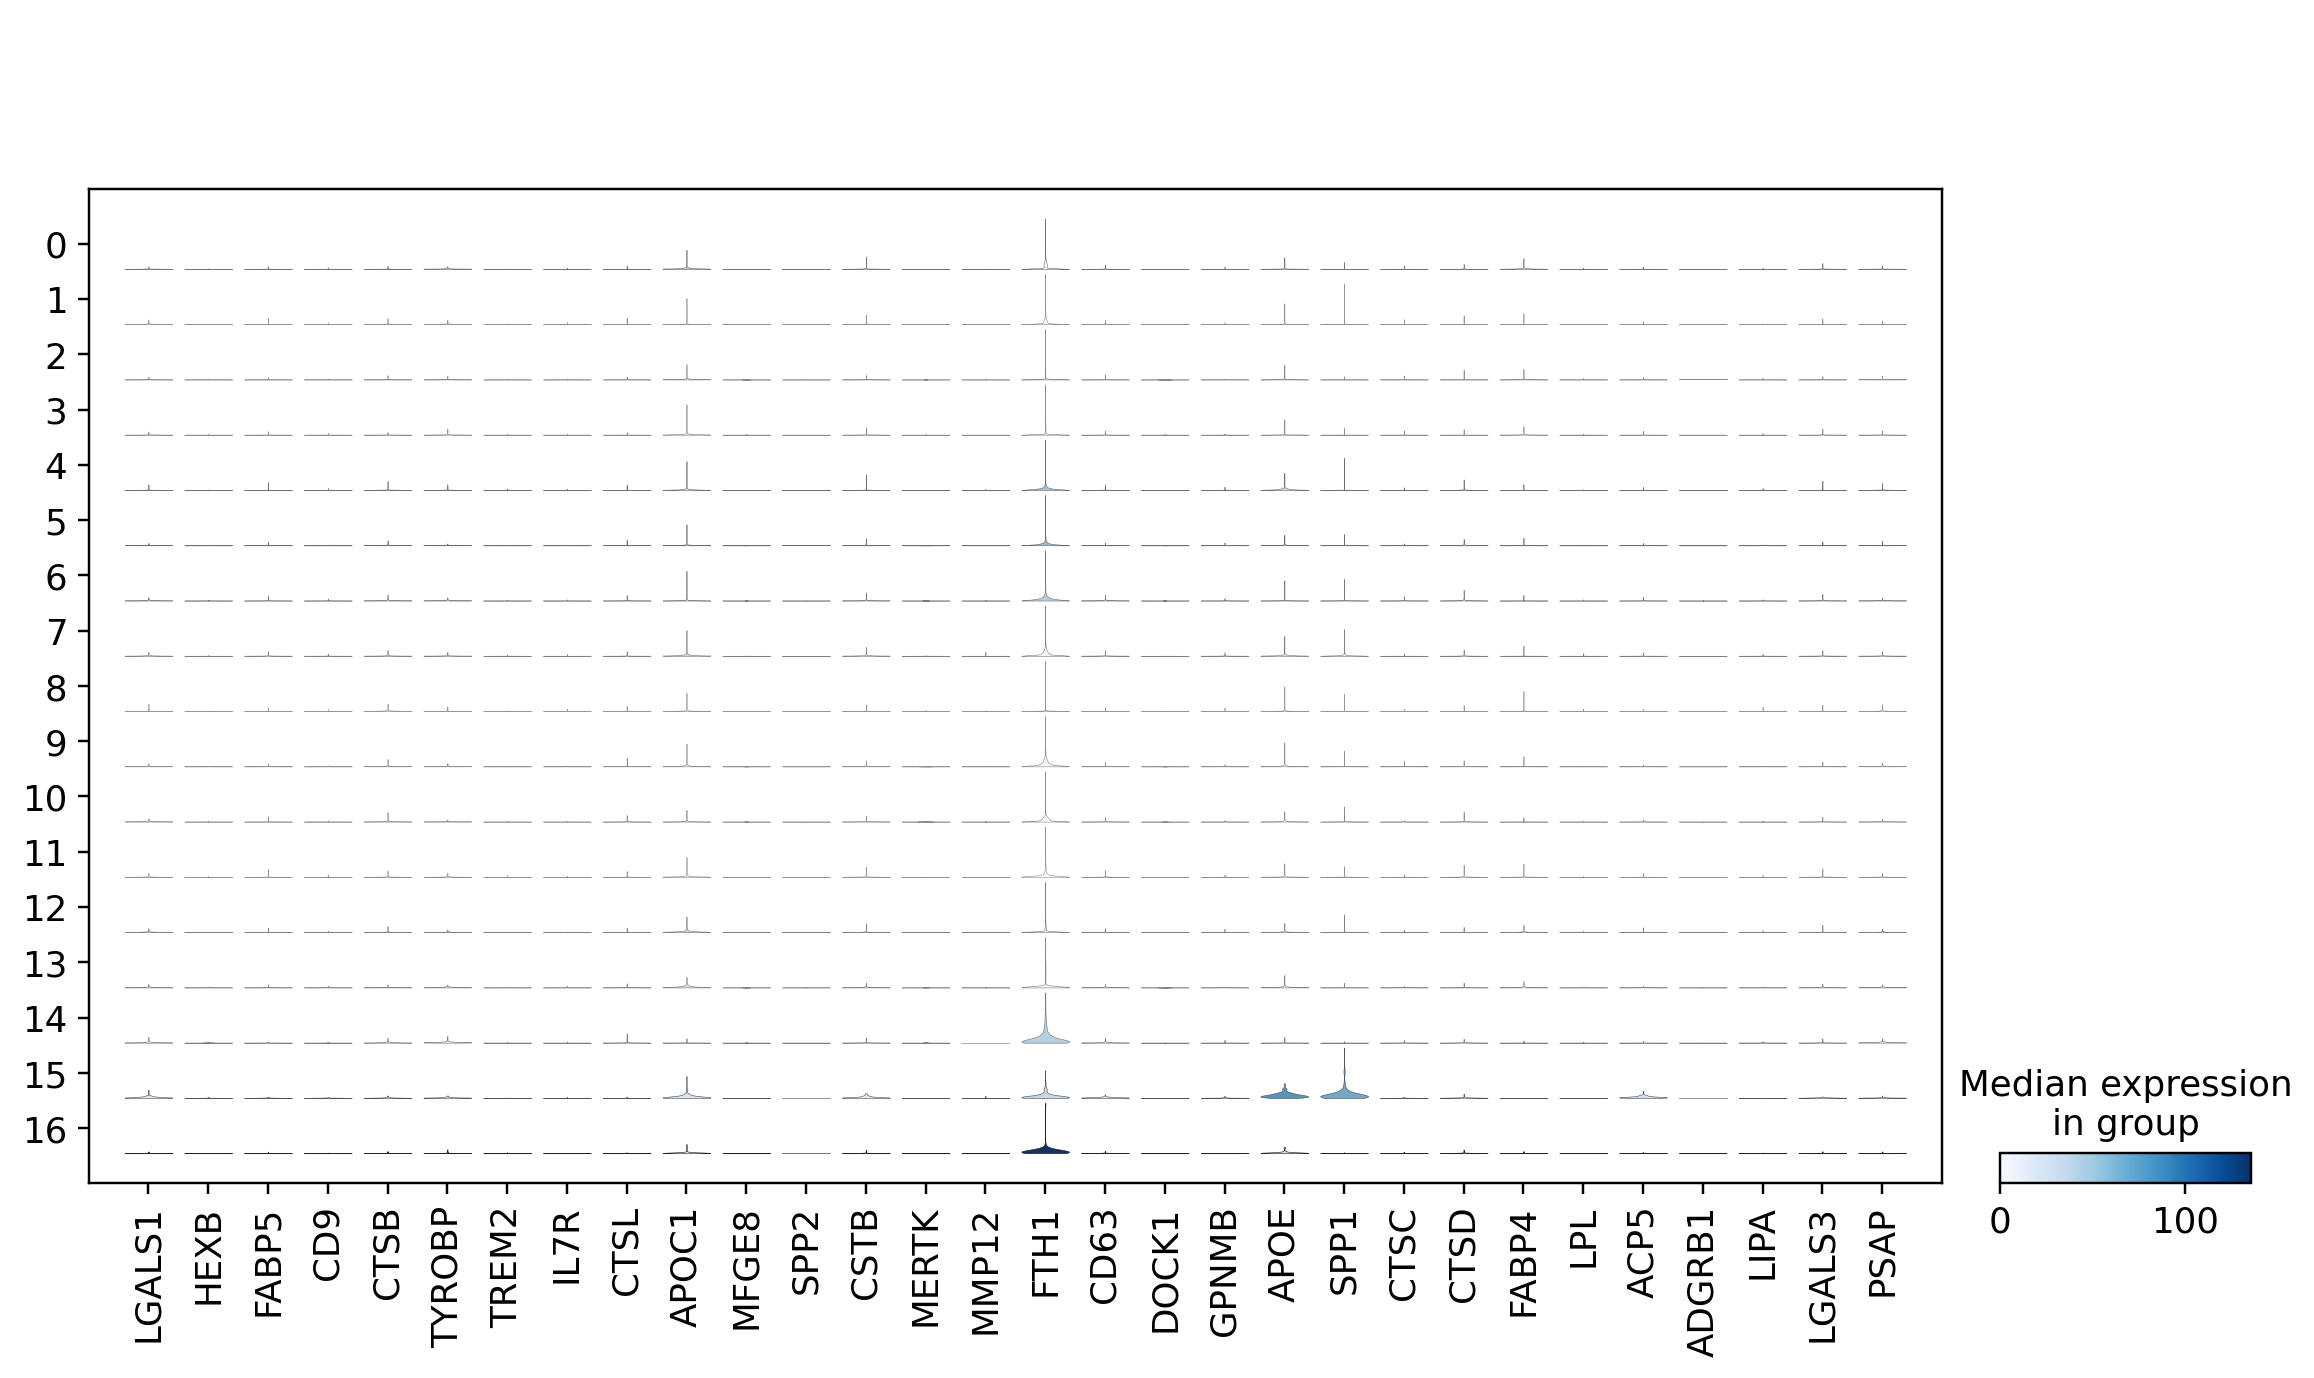

In [60]:
sc.pl.stacked_violin(ad, var_names=marker_genes_all, groupby='leiden') # dendrogram=True)

In [61]:
ad_bal[ad_bal.obs['study'] == 'morse',:].obs['cell.type'].value_counts()

Series([], Name: cell.type, dtype: int64)

In [62]:
ad.to_df()['SPP1'].describe()

count    138341.000000
mean          1.709933
std           3.036393
min           0.000000
25%           0.000000
50%           0.000000
75%           3.777106
max          11.851416
Name: SPP1, dtype: float64

In [63]:
bal.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,ensembl,symbol
AL627309.1,0.004206,0.004324,0.006471,0.668145,0,ENSG00000238009,AL627309.1
AL627309.3,0.000362,0.000407,0.000421,0.965306,0,ENSG00000239945,AL627309.3
AL627309.4,0.001357,0.001355,0.001767,0.766767,0,ENSG00000241599,AL627309.4
AL669831.2,0.000430,0.000429,0.000507,0.846792,0,ENSG00000229905,AL669831.2
AL669831.5,0.062744,0.076084,0.107797,0.705806,0,ENSG00000237491,AL669831.5
...,...,...,...,...,...,...,...
AL354822.1,0.049721,0.062037,0.086614,0.716248,0,ENSG00000278384,AL354822.1
AC004556.1,0.082551,0.191010,0.142380,1.341548,0,ENSG00000276345,AC004556.1
AC233755.2,0.008298,0.256907,0.014290,8.053228,1,ENSG00000277856,AC233755.2
AC233755.1,0.008117,0.099807,0.013935,6.890781,1,ENSG00000275063,AC233755.1


### Save a copy of obs in compressed format for inspection (Oliver).

In [64]:
ad.shape

(138341, 17656)

In [65]:
!readlink -f .

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks


In [66]:
for c in ad.obs.columns:
    print(c)
    print(ad.obs[c].value_counts())
    print('')

GSM
nan           120790
GSM3660648      2104
GSM3660644      1935
GSM3660646      1743
GSM3660647      1733
GSM3660652      1519
GSM3660651      1371
GSM3660658      1323
GSM3660653      1223
GSM3660657      1099
GSM3660645      1080
GSM3660655       842
GSM3660654       509
GSM3660656       415
GSM3660643       239
GSM3660642       213
GSM3660641       203
Name: GSM, dtype: int64

sample.id
nan            120790
SC156NORUP       2104
SC45NOR          1935
SC59NOR          1743
SC155NORLOW      1733
SC88IPFUP        1519
SC87IPFLOW       1371
SC154IPFUP       1323
SC89IPFLOW       1223
SC153IPFLOW      1099
SC56NOR          1080
SC94IPFUP         842
SC93IPFLOW        509
SC95IPFLOW        415
SC31DNOR          239
SC31NOR           213
SC14NOR           203
Name: sample.id, dtype: int64

n_counts
4248.0     28
4106.0     27
4273.0     26
3607.0     26
1554.0     26
           ..
20500.0     1
24295.0     1
20479.0     1
20797.0     1
15997.0     1
Name: n_counts, Length: 26374, dtype

In [68]:
obs = ad.obs
print(obs.shape)
obs.to_csv('../data/barcodes_cluster_annotation.csv.gz', compression='gzip')


(138341, 80)


In [69]:
ad.shape

(138341, 17656)

In [70]:
rcParams['figure.dpi'] = 80
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 10))
ax = ax.flatten()

marker_genes = ['TREM2', 'SPP1', 'CD9', 'LPL', 'FABP4']
for pi, g in enumerate(marker_genes):
    sc.pl.umap(ad, color=g, title=g, use_raw=False, ax=ax[pi], show=False)

plt.subplots_adjust(bottom=.3)

save = 1 # 1
if save:
    plt.savefig('../data/figures/marker_genes.pdf')
    plt.close()

### Define custom markers based on revision

In [74]:
ll ../data/

total 1641982
drwxr-xr-x. 5 ignacio.ibarra        18 Oct 22  2020 adams/
-rw-r--r--. 1 ignacio.ibarra  66141194 Oct 12  2020 APC-1_A1A2_rm-LQ-HTO-T-NK-MOI15_cMono.Rds
drwxr-xr-x. 2 ignacio.ibarra         5 Oct 26  2020 bal/
-rw-r--r--. 1 ignacio.ibarra  61965108 Oct 28  2020 bal_cells_uniquely_mapped.h5ad
-rwxr-xr-x. 1 ignacio.ibarra    267283 Mar 17  2021 BAL-Mac_labels.csv*
-rw-r--r--. 1 ignacio.ibarra 496524589 Oct 12  2020 BAL_rmLQ-C3_MDM-AM_rmCD3.Rds
-rw-r--r--. 1 ignacio.ibarra 738052226 Oct 12  2020 BAL_rmLQ-C3.Rds
-rw-r--r--. 1 ignacio.ibarra   7332178 Nov 30 16:57 barcodes_cluster_annotation.csv.gz
-rw-------. 1 ignacio.ibarra  48222101 Jul  7 10:49 barcodes_cluster_annotation_OD.csv
drwxr-xr-x. 2 ignacio.ibarra         4 Nov 16 23:57 budinger/
-rw-r--r--. 1 ignacio.ibarra   2290986 Oct 22  2020 CCA_3nor3ipf_WorkspaceV4_newipfupdated_ClusterIdent.csv
-rw-r--r--. 1 ignacio.ibarra   1120407 Oct 22  2020 CCA_NorControls_WorkspaceV2_activeIdent.csv
-rw-r--r--. 1 ignacio.ibarra    

In [75]:
## a new annotations has been proposed and has to be incorporated into the objects
mapping_revision_2021 = pd.read_csv('../data/barcodes_cluster_annotation_OD.csv', index_col=0)
assert sum(ad.obs.index == mapping_revision_2021.index) == ad.shape[0]


/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
ad.obs['bal_clusters'] = ad.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())
ad.obs['bal_clusters'].value_counts()
ad.obs['mdm.type'] = ad.obs['bal_clusters']

### Define custom colors for MDMs.

In [77]:
ad.obs['mdm.type'].value_counts()

other            130838
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: mdm.type, dtype: int64

In [78]:
# color_map = {"MDM 1": "#009E73",
#              "MDM 2": "#E69F00",
#              "MDM 3A": "#D55E00",
#             "MDM 3B": "#A020F0",
#             "AM 2": "#0072B2",
#             "AM 1": "#56B4E9",
#             "Undefined": "#999999",
#             # 'BALF': 'gray',
#             'Others (COVID)' : 'lightgray',
#             'Others (Adams/Morse/Budinger)': 'lightgray'}

color_map = {
          "1 FCN1-Mono": "#009E73",
          "2 Mono/Mp": "#E69F00",
          "3 SPP1/LGMN-Mp": "#D55E00",
          "4 SPP1/TREM2-Mp": "#A020F0",
          "5 INHBA-AMp": "#0072B2",
          "6 Prolif. AMp": "#56B4E9",
          "Low quality": "#999999",
          # 'BALF': 'gray',
          'Others (COVID)' : 'lightgray',
          'Others (A/M/B)': 'lightgray'}

color_map = {
  "Monocytes"     : "#009E73",
  "Mono/Mφ"       : "#E69F00",
  "CD163/LGMN-Mφ" : "#D55E00",
  "AMφ-1"         : "#A020F0",
  "AMφ-2"         : "#0072B2",
  "Prolif. AMφ"   : "#56B4E9",
  "other"   : "#D3D3D3",
  'low quality'   : "#D3D3D3"
}

ad.obs['mdm.type'] = ad.obs['mdm.type'].astype('category')

ad.obs['disease.status'] = ad.obs['disease.status'].str.replace('Control', 'control')


colors = ad.obs['mdm.type'].cat.categories.map(color_map)
ad.uns['mdm.type_colors'] = ad.obs['mdm.type'].cat.categories.map(color_map)

In [79]:
color_map

{'Monocytes': '#009E73',
 'Mono/Mφ': '#E69F00',
 'CD163/LGMN-Mφ': '#D55E00',
 'AMφ-1': '#A020F0',
 'AMφ-2': '#0072B2',
 'Prolif. AMφ': '#56B4E9',
 'other': '#D3D3D3',
 'low quality': '#D3D3D3'}

In [80]:
ad[ad.obs['mdm.type'] != 'Others (A/M/B)',:].obs['mdm.type'].value_counts()

other            130838
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: mdm.type, dtype: int64

In [81]:
ad.uns['mdm.type_colors'].value_counts()

#D3D3D3    2
#A020F0    1
#0072B2    1
#D55E00    1
#E69F00    1
#009E73    1
#56B4E9    1
dtype: int64

In [82]:
ad.obs['mdm.type'].cat.categories

Index(['AMφ-1', 'AMφ-2', 'CD163/LGMN-Mφ', 'Mono/Mφ', 'Monocytes',
       'Prolif. AMφ', 'low quality', 'other'],
      dtype='object')

In [83]:
ad.obs['disease.status'] = ad.obs['disease.status'].str.replace('Control', 'control')
ad.obs['disease.status'] = np.where(ad.obs['disease.status'].str.contains('nan'), 'BAL', ad.obs['disease.status'])
ad.obs['cell.type'] = np.where(ad.obs['cell.type'].str.contains('nan'), ad.obs['Subclass_Cell_Identity'], ad.obs['cell.type'])
ad.obs['cell.type'] = np.where(ad.obs['cell.type'].str.contains('nan'), ad.obs['Celltype_2'], ad.obs['cell.type'])

In [84]:
sc.set_figure_params(vector_friendly=True)

In [85]:
ad.obs['disease.status'] = np.where(ad.obs['disease.status'].isin({'BAL (NA)', 'covid'}),
                                    ad.obs['disease.status'].map({'BAL (NA)': 'COVID-19 (this work)', 'covid': 'COVID-19 (Budinger)'}),
                                    ad.obs['disease.status'])

In [86]:
ad.obs['disease.status'].value_counts().sum()

138341

In [87]:
ad.obs['disease.status'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
COVID-19 (Budinger)     22810
COVID-19 (this work)     7503
Name: disease.status, dtype: int64

In [88]:
# define colors for the disease.status
color_map = {
          "IPF": "#249d68",
          "COVID-19 (this work)": "#2177b4",
          "COVID-19 (Budinger)": "#d52928",
          "COPD": "#f47e1f",
          "control": "lightgray"}

ad.obs['disease.status'] = ad.obs['disease.status'].astype('category')
colors = ad.obs['disease.status'].cat.categories.map(color_map)
ad.uns['disease.status_colors'] = ad.obs['disease.status'].cat.categories.map(color_map)

In [89]:
print(ad.obs['disease.status'].cat.categories, ad.uns['disease.status_colors'])

Index(['COPD', 'COVID-19 (Budinger)', 'COVID-19 (this work)', 'IPF',
       'control'],
      dtype='object') Index(['#f47e1f', '#d52928', '#2177b4', '#249d68', 'lightgray'], dtype='object')


In [90]:
ad.obs['mdm.type'].value_counts()

other            130838
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: mdm.type, dtype: int64

In [91]:
ad.obs['is.others'] = ad.obs['mdm.type'].str.lower().str.contains('other')
ad_copy = ad[ad.obs.sort_values('is.others', ascending=False).index,:]

In [92]:
# make a copy of the whole object before plotting
# print(ad.obs['disease.status'].cat.categories, ad.uns['disease.status_colors'])

In [93]:
del ad_copy.uns['mdm.type_colors']

In [94]:
# ad_copy.uns['mdm.type_colors']

In [95]:
color_map

{'IPF': '#249d68',
 'COVID-19 (this work)': '#2177b4',
 'COVID-19 (Budinger)': '#d52928',
 'COPD': '#f47e1f',
 'control': 'lightgray'}

In [96]:
ad_copy.uns['mdm.type_colors'] = ad_copy.obs['mdm.type'].cat.categories.map(color_map)

Trying to set attribute `._uns` of view, copying.


In [97]:
ad_copy.obs['mdm.type'].cat.categories

Index(['AMφ-1', 'AMφ-2', 'CD163/LGMN-Mφ', 'Mono/Mφ', 'Monocytes',
       'Prolif. AMφ', 'low quality', 'other'],
      dtype='object')

In [98]:
ad_copy.uns['mdm.type_colors']

Float64Index([nan, nan, nan, nan, nan, nan, nan, nan], dtype='float64')

In [99]:
rcParams['figure.figsize'] = [12, 5]
rcParams['figure.dpi'] = 100
ax = plt.subplot(1, 2, 1)


print('plotting 1st...')
sc.pl.umap(ad_copy, color='mdm.type', title='mdm.type', size=np.where(ad_copy.obs['mdm.type'].astype(str).str.contains('other'), 1.0, 25),
           ax=ax, show=False) # colors)

# plt.xlabel('UMAP1'); plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1, 2, 2)
print('plotting 2nd...')
sc.pl.umap(ad_copy, color='disease.status', title='disease.status', size=np.where(ad_copy.obs['disease.status'].astype(str) == 'nan', 5.0, 5.0),
           ax=ax, show=False)

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.subplots_adjust(bottom=.35)

plt.savefig('../data/figures/mdm_and_disease_status_revision.pdf')
plt.close()



/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell.type' as categorical
/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'bal_clusters' as categorical


plotting 1st...
plotting 2nd...


In [100]:
print('here...')

here...


In [101]:
ad.obs['disease.status'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
COVID-19 (Budinger)     22810
COVID-19 (this work)     7503
Name: disease.status, dtype: int64

In [102]:
print(ad.obs['disease.status'].value_counts().sum())

138341


In [103]:
print('done...')

done...


In [104]:
sc.tl.embedding_density(ad, groupby='disease.status')

/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell.type' as categorical
/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'bal_clusters' as categorical


In [105]:
sc.set_figure_params(facecolor='white')

In [106]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='disease.status')

In [107]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_disease.status', show=False,
                             save='mdm_and_disease_status_density_revision.pdf') #  group='is.BAL')
# plt.savefig('data/figures/mdm_and_disease_status_density.pdf')
# plt.close()

### Make a second density now highlighting the respective MDM from this work and the ones from Budinger.

In [108]:
ad.obs['mdm.type'].value_counts()

other            130838
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: mdm.type, dtype: int64

In [109]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='mdm.type')

In [111]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_mdm.type', show=False,
                             save='mdm.type_density_revision.pdf', color_map='Greens') #  group='is.BAL')

In [112]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='Cluster')

In [113]:
ad.obs['Cluster'].value_counts()

nan          115531
MoM2          10453
MoM3           8845
Monocytes      1968
AM1            1030
AM2             290
MoM1            224
Name: Cluster, dtype: int64

In [114]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_Cluster', show=False,
                             save='Cluster_density_revision.pdf', color_map='Greens') #  group='is.BAL')

In [115]:
ad.obs['mdm.type.spp1.and.lgmn'] = np.where(ad.obs['mdm.type'].astype(str).isin({"3 SPP1/LGMN-Mp", "4 SPP1/TREM2-Mp"}), 'SPP1/TREM2+SPP1', ad.obs['mdm.type'])

In [116]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='mdm.type.spp1.and.lgmn')

/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'mdm.type.spp1.and.lgmn' as categorical


In [117]:
ad.obs['mdm.type.spp1.and.lgmn'].value_counts()

other            130838
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: mdm.type.spp1.and.lgmn, dtype: int64

In [118]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100
# ax = plt.subplot()
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_mdm.type.spp1.and.lgmn', show=False,
                             save='mdm.type.spp1.and.lgmn_density_revision.pdf', color_map='Greens') #  group='is.BAL')

### Finally, prepare an embedding density only showing the cells that are MoAM 4/2/3

In [119]:
budinger = get_budinger()

budinger
True ../data/budinger/budinger_input_scvi_scanpy_norm.h5ad
scoring MP.markers 20
scoring MP.others 10
scoring MP.all 31


In [120]:
mdm_type_by_bc = budinger.obs.set_index('Unnamed: 0')['Cell Type'].to_dict()
ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'budinger', ad.obs['Unnamed: 0'].map(mdm_type_by_bc), ad.obs['mdm.type'])
ad.obs['disease.status'] = np.where((ad.obs['study'] == 'budinger'), ad.obs['mdm.type'], ad.obs['disease.status'])

In [121]:
ad.obs['disease.status'].value_counts()

control                 39409
IPF                     38460
COPD                    30159
MoAM-1                   8188
MoAM-2                   7665
COVID-19 (this work)     7503
MoAM-3                   5037
TRAM-2                    842
TRAM-1                    822
MoAM-4                    129
TRAM-3                    127
Name: disease.status, dtype: int64

In [122]:
# ad.obs[lab] = ad.obs[lab].astype(float)
sc.tl.embedding_density(ad, basis='umap', groupby='key.budinger')

/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'disease.status' as categorical
/home/icb/ignacio.ibarra/miniconda3/envs/covid_macrophages_integration/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'mdm.type' as categorical


ValueError: Could not find 'key.budinger' `.obs` column.

In [ ]:
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_key.budinger', show=False,
                             save='key.budinger_density_revision.pdf', color_map='Greens') #  group='is.BAL')

In [ ]:
# ad.obs[lab] = ad.obs[lab].astype(float)
ad.obs['label.MoAM.merged'] = np.where(ad.obs['disease.status'].isin({'MoAM-4', 'MoAM-3', 'MoAM-2'}), 'MoAM-2/3/4', ad.obs['disease.status'])
sc.tl.embedding_density(ad, basis='umap', groupby='label.MoAM.merged')

In [ ]:
ad.obs['label.MoAM.merged'].value_counts()

In [ ]:
fig = sc.pl.embedding_density(ad, basis='umap', key='umap_density_label.MoAM.merged', show=False,
                             save='label.MoAM.merged_density_revision.pdf', color_map='Greens') #  group='is.BAL')

In [ ]:
fig

In [ ]:
# adpbmc = sc.datasets.pbmc68k_reduced()
# sc.tl.umap(adpbmc)
# sc.tl.embedding_density(adpbmc, basis='umap', groupby='phase')
# sc.pl.embedding_density(adpbmc, basis='umap', key='umap_density_phase', group='G1')
# sc.pl.embedding_density(adpbmc, basis='umap', key='umap_density_phase', group='S')

In [ ]:
rcParams['figure.figsize'] = [5, 5]
rcParams['figure.dpi'] = 100

for show_everything in [True, False]:
    pi = 0
    for condition in set(ad.obs['disease.status']):
        print(pi, condition)
        ax = plt.subplot(2, 2, pi + 1)
        pi += 1
        lab = 'is.%s' % condition
        ad.obs[lab] = (ad.obs['disease.status'] == condition).astype('category')

        n_true = sum(ad.obs[lab] == True)
        print(ad.obs[lab].value_counts())

        # sc.pl.umap(ad[(ad.obs[lab] == True) | show_everything,:], color=lab, title=condition + ', n=%i' % n_true,
        #            size=np.where(ad[(ad.obs[lab] == True) | show_everything,:].obs[lab], 1.0, .5), sort_order=False,
        #            ax=ax, show=False, palette=['gray', 'red'])
        

                
        sc.tl.embedding_density(ad, groupby=lab)
        # sc.pl.umap(ad, color=lab, title=condition + ', n=%i' % n_true,
        #            size=np.where(ad.obs[lab] == True, 1.0, 0 if not show_everything else .1), sort_order=False,
        #            ax=ax, show=False, palette=['gray', 'red'])

        sc.pl.embedding_density(ad, color=lab, title=condition + ', n=%i' % n_true,
                                size=np.where(ad.obs[lab] == True, 1.0, 0 if not show_everything else .1), sort_order=False,
                                ax=ax, show=False, palette=['gray', 'red'])

        ax.get_legend().remove()
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        print('next...')
    plt.savefig('../data/figures/mdm_and_disease_status_show_bg_%s.pdf' % show_everything)
    plt.close()
plt.tight_layout()
plt.subplots_adjust(bottom=.35)

    

In [ ]:
markers = ["LGMN", "MERTK", "INHBA", "MRC1", "CD9", "TGFBI", "TGFB1",
           "MMP9", "TREM2", "APOE", "FABP4", "S100A8", "FCN1", "C1QA",
           "CCL2", "CCR2", "CCL8", "CCL13", "MARCKS", "SPP1", 'CCL18']

In [ ]:
print(len(markers))

In [ ]:
# Fix export PDF as text issue
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
sc.set_figure_params(vector_friendly=True)

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 7, figsize=(22.5, 10))
ax = ax.flatten()

for gi, g in enumerate(markers):
    print(gi,  g in set(ad.var.index))
    if not g in set(ad.var.index):
        continue
    sc.pl.umap(ad, color=g, title=g, ax=ax[gi], show=False, use_raw=False, vmin=0, vmax=10, cmap='magma_r')
    # ax[gi].get_legend().remove()
    plt.xlabel('')
    plt.ylabel('')
    ax[gi].spines['right'].set_visible(False)
    ax[gi].spines['top'].set_visible(False)
    ax[gi].spines['left'].set_visible(False)
    ax[gi].spines['bottom'].set_visible(False)
    
plt.savefig('../data/figures/marker_genes_extended_revision.pdf')
plt.close()


In [ ]:
ad.obs[['study', 'patient.id', 'disease.status']].drop_duplicates('patient.id')

In [ ]:
patient_metadata = ad.obs[['study', 'patient.id', 'disease.status']].drop_duplicates('patient.id') # ['study'].value_counts()
print(ad.obs[['study', 'patient.id', 'disease.status']].drop_duplicates('patient.id').groupby(['study','disease.status']).size())
patient_metadata.to_csv('../data/patient_integration_metadata.tsv', sep='\t', index=None)